In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [48]:
nombres_columnas = [
    "Tipo",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

data = pd.read_table("C:/Users/juanb/OneDrive/Escritorio/Análsis de Datos/wine.data", delimiter=',', names=nombres_columnas)

In [49]:
pd.options.display.max_rows = None
data

,Tipo,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [100]:
data.describe()

,Tipo,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

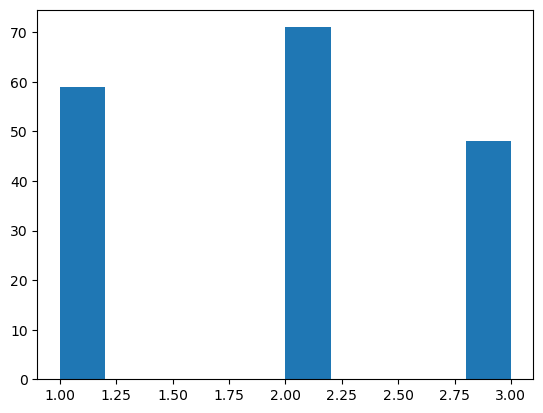

In [50]:
plt.hist(data.Tipo)

In [91]:
#Dividimos los datos en conjuntos de entrenamiento y prueba
X = data.drop("Tipo", axis=1)  # Características
y = data["Tipo"]  # Etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [92]:
#Creamos el modelo del árbol de decisiones
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [93]:
#Evaluamos el proyecto
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisiones: {accuracy:.2f}")

Precisión del árbol de decisiones: 0.97


In [94]:
tree = DecisionTreeClassifier()

In [95]:
arbol = tree.fit(X_train, y_train)

[Text(0.4444444444444444, 0.9, 'x[9] <= 3.82\ngini = 0.661\nsamples = 142\nvalue = [45, 56, 41]'),
 Text(0.2222222222222222, 0.7, 'x[12] <= 790.0\ngini = 0.111\nsamples = 51\nvalue = [3, 48, 0]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(0.3333333333333333, 0.5, 'x[9] <= 3.435\ngini = 0.49\nsamples = 7\nvalue = [3, 4, 0]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[6] <= 1.58\ngini = 0.576\nsamples = 91\nvalue = [42, 8, 41]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]'),
 Text(0.7777777777777778, 0.5, 'x[12] <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.6666666666666666, 0.3, 'x[10] <= 0.83\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.7777777777777778,

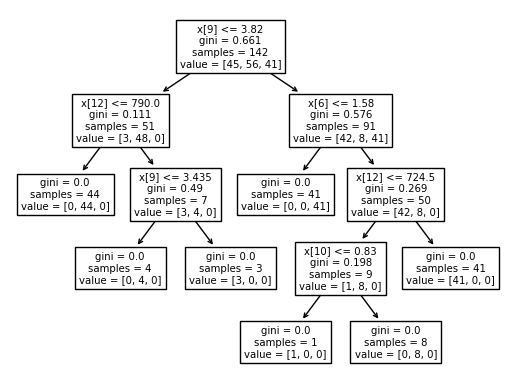

In [99]:
#Mostramos el árbol de decisiones 
plot_tree(arbol)